In [4]:
import pandas as pd
import sys
import os

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [5]:
# read in the data relevant for this figure
def get_sc_data():
    fname = '../processing/talon/sc_talon_read_annot.tsv'

    df = pd.read_csv(fname, sep='\t')
    df = add_read_annot_metadata(df)
    
    return df

### Panel S1D

  transcript_novelty  counts
0          Antisense   31092
1            Genomic  214230
2                ISM  146232
3         Intergenic   18959
4              Known   22279
5                NIC   15502
6                NNC   17784


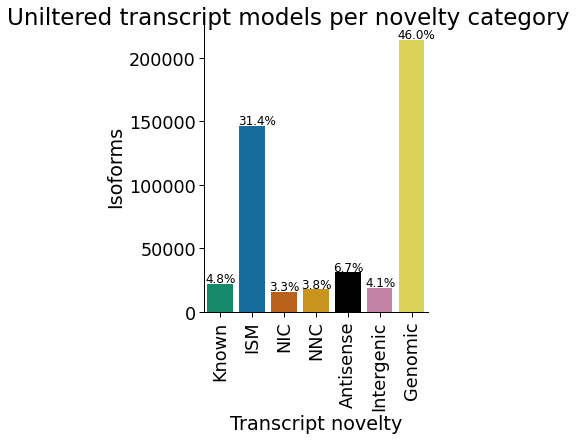

<Figure size 432x288 with 0 Axes>

In [6]:
opref = 'figures/sc_unfiltered'
df = get_sc_data()
c_dict, order = get_talon_nov_colors()
plot_transcript_novelty(df, opref, c_dict, order,
                        title='Uniltered', ylim=230000)